<a href="https://colab.research.google.com/github/dlee449/CS334_lyrics/blob/master/Copy_of_CS334Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from collections import defaultdict
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_total = pd.read_csv('dat_total.csv')
df_total

,Unnamed: 0,artist,name,popularity,genre,lyrics
0,0,Steady Rollin,I Feel Alive,0,rock,the trees are singing in the wind the sky blue...
1,1,Bell Biv DeVoe,Poison,0,r&b,na yeah spyderman and freeze in full effect uh...
2,2,CeeLo Green,Baby It's Cold Outside (feat. Christina Aguilera),0,r&b,i really cant stay baby its cold outside ive g...
3,3,KARD,Dumb Litty,0,pop,get up out of my business you dont keep me fro...
4,4,James TW,Soldier,1,r&b,hold your breath dont look down keep trying da...
...,...,...,...,...,...,...
15400,15400,NAV,Some Way,1,r&b,yeah nah nah nah nah nah nah nah nah nah nah n...
15401,15401,Qulinez,Rising Like The Sun - Radio Mix,0,edm,caught up in such a head rush wideeyed lately ...
15402,15402,Nicki Minaj,Anaconda,0,pop,my anaconda dont my anaconda dont my anaconda ...
15403,15403,Ponderosa Twins Plus One,Bound,0,r&b,bound bound bound bound bound to fall in love ...


In [ ]:
def split_data(features, labels):
  xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size = 0.3, random_state = 1)
  return xTrain, xTest, yTrain, yTest

In [ ]:
total_xTrain, total_xTest, total_yTrain, total_yTest = split_data(df_total['lyrics'], df_total['popularity'])

In [ ]:
def build_vocab_map(df):

    # create a default dict for counting unique vocabs in each email
    vocab_counts = defaultdict(int)

    # for every email
    for i in range(df.shape[0]):
        # create a list of vocabs of the email
        vocabs = df.iloc[i].split(" ")
        # make list into a list of unique vocabs
        vocabs = set(vocabs)
        # for each unique vocabs
        for vocab in vocabs:
            # count unique vocabs in each email
            vocab_counts[vocab] += 1

    # create a dictionary for the vocabulary map
    vocab_map = {}

    # for every vocab and its counts
    for word, count in vocab_counts.items():
        # select the words that appear in at least 30 emails
        if count >= 30:
            vocab_map[word] = count

    if '' in vocab_map:
      vocab_map.pop('', None)

    return vocab_map

In [ ]:
total_vocab = build_vocab_map(total_xTrain)
len(total_vocab.keys())

3509

In [ ]:
def construct_binary(train_df, vocab_map):

    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the binary dataset
    binary_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of unique vocabs in an email
        vocabs = train_df.iloc[i].split(" ")
        vocabs = set(vocabs)

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # if the words in the vocabulary map is in the email
            if frequent_words[j] in vocabs:
                # set vector as 1
                binary_train[i, j] = 1

    return pd.DataFrame(binary_train, columns = frequent_words)

In [ ]:
def construct_count(train_df, vocab_map):

    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the count dataset
    count_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of vocabs in an email
        vocabs = train_df.iloc[i].split(" ")

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # count the number of times the jth word appears in the email
            count_train[i,j] = vocabs.count(frequent_words[j])

    return pd.DataFrame(count_train, columns = frequent_words)

In [ ]:
def construct_all(xTrain, xTest, vocab_list):
  binary_train = construct_binary(xTrain, vocab_list)
  binary_test = construct_binary(xTest, vocab_list)
  count_train = construct_count(xTrain, vocab_list)
  count_test = construct_count(xTest, vocab_list)
  return binary_train, binary_test, count_train, count_test

In [ ]:
total_binary_train, total_binary_test, total_count_train, total_count_test = construct_all(total_xTrain, total_xTest, total_vocab)

In [ ]:
total_binary_train

,and,new,reality,a,oh,high,be,will,mold,na,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10781,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_count_train

,and,new,reality,a,oh,high,be,will,mold,na,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,4.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,0.0,0.0,10.0,16.0,0.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,0.0,0.0,1.0,8.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,1.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,9.0,1.0,0.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,2.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,3.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10781,2.0,0.0,0.0,4.0,2.0,0.0,16.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_binary_test

,and,new,reality,a,oh,high,be,will,mold,na,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4618,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4619,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4620,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_count_test

,and,new,reality,a,oh,high,be,will,mold,na,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,5.0,4.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,0.0,0.0,22.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,1.0,0.0,7.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,6.0,5.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,8.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4618,10.0,3.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4619,1.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4620,6.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def pos_neg_words(model, word_dict):
  word_list = list(word_dict.keys())
  pos_indices = np.argsort(model.coef_[0])[::-1]
  words_pos = []
  for i in range(15):
      index = pos_indices[i]
      words_pos.append(word_list[index])

  neg_indices = np.argsort(model.coef_[0])
  words_neg = []
  for i in range(15):
      index = neg_indices[i]
      words_neg.append(word_list[index])

  return words_pos, words_neg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

def perceptron_optimal(xTrain, yTrain, word_list):

  max_iters = [1, 10, 20, 40, 80, 120, 150]
  learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

  plt.figure(figsize=(12, 8))  # Create a figure

  # Plot number of mistakes based on max_iter for different learning rates
  for lr in learning_rates:
    mistakes = []

    for max_iter in max_iters:
      model = Perceptron(random_state=2, max_iter=max_iter, eta0=lr)
      model.fit(xTrain, yTrain)

      predictions = model.predict(xTrain)

      num_mistakes = sum(predictions != yTrain)

      mistakes.append(num_mistakes)

    # Plot the line for current learning rate
    label = 'Learning Rate = {}'.format(lr)
    plt.plot(max_iters, mistakes, '-', label=label)

  plt.xlabel('Max Iterations')
  plt.ylabel('Number of Mistakes')
  plt.legend()
  plt.title('Number of Mistakes vs. Max Iterations for Different Learning Rates')
  plt.show()


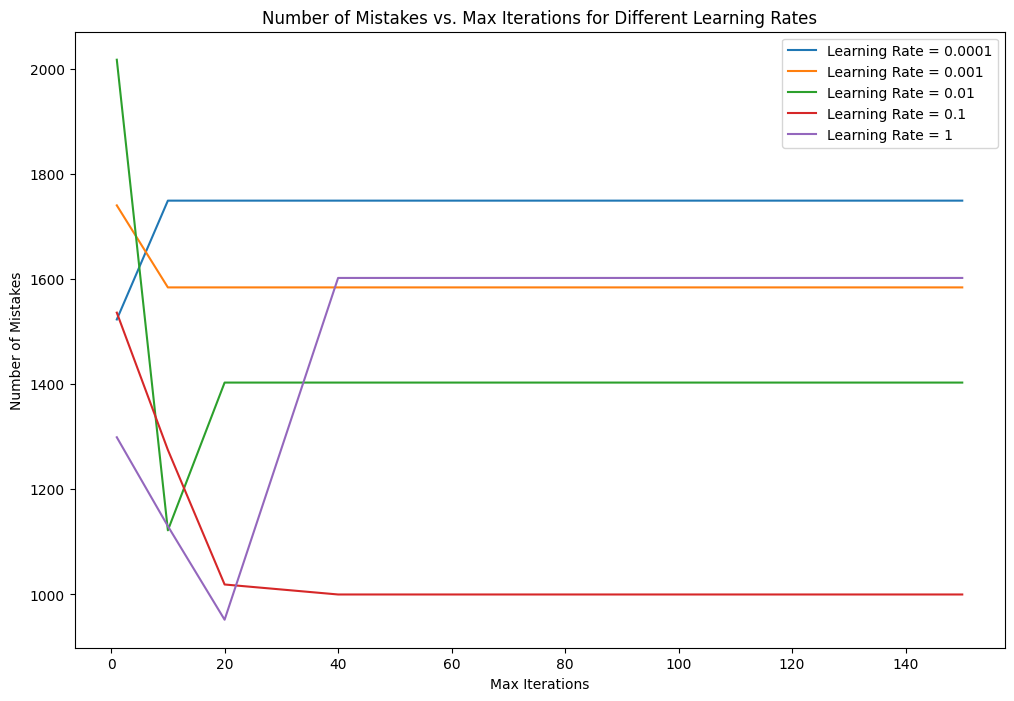

In [ ]:
perceptron_optimal(total_binary_train, total_yTrain, total_vocab)

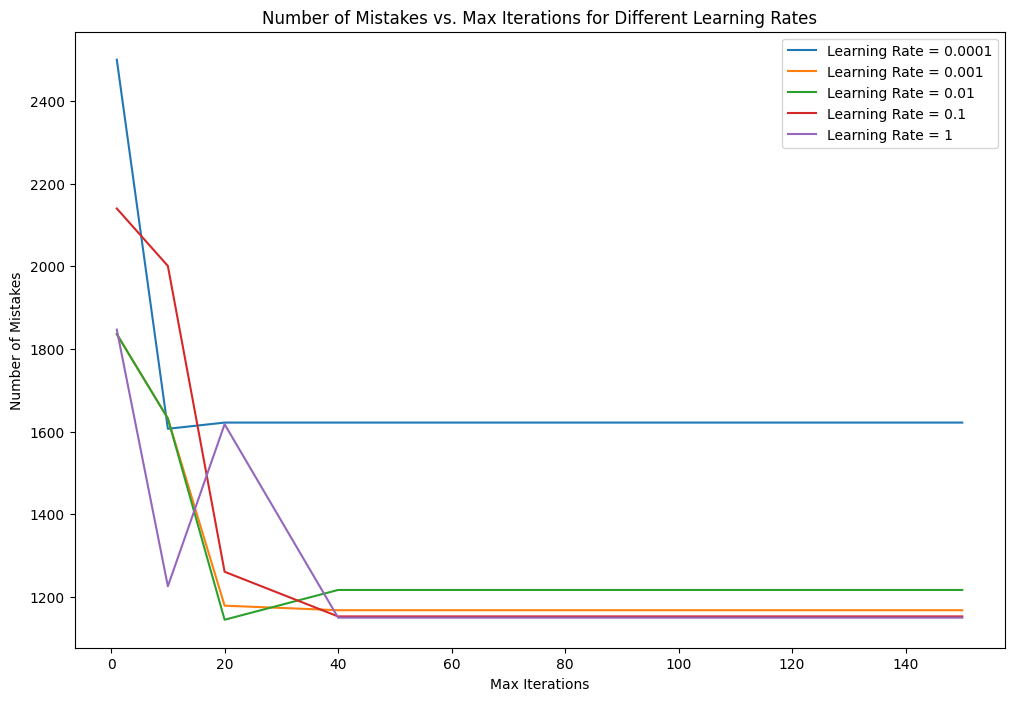

In [ ]:
perceptron_optimal(total_count_train, total_yTrain, total_vocab)

In [ ]:
total_max_iters = [40, 40]
total_learning_rates = [0.1, 1]

In [ ]:
def perceptron_accuracy(binary_train, binary_test, count_train, count_test, yTrain, yTest, word_list, max_iters, learning_rates):
  model_binary = Perceptron(random_state = 1, max_iter = max_iters[0], eta0 = learning_rates[0])
  model_binary.fit(binary_train, yTrain)
  model_count = Perceptron(random_state = 1, max_iter = max_iters[1], eta0 = learning_rates[1])
  model_count.fit(count_train, yTrain)
  predictions_binary_train = model_binary.predict(binary_train)
  predictions_binary_test = model_binary.predict(binary_test)
  predictions_count_train = model_count.predict(count_train)
  predictions_count_test = model_count.predict(count_test)
  num_mistakes_binary_train = sum(predictions_binary_train != yTrain)
  num_mistakes_binary_test = sum(predictions_binary_test != yTest)
  num_mistakes_count_train = sum(predictions_count_train != yTrain)
  num_mistakes_count_test = sum(predictions_count_test != yTest)
  print("Number of mistakes on binary train data: ", num_mistakes_binary_train)
  print("Number of mistakes on binary test data: ", num_mistakes_binary_test)
  print("Number of mistakes on count train data: ", num_mistakes_count_train)
  print("Number of mistakes on count test data: ", num_mistakes_count_test)
  binary_train_score = accuracy_score(predictions_binary_train, yTrain)
  print("Accuracy score on binary train data: ", binary_train_score)
  binary_test_score = accuracy_score(predictions_binary_test, yTest)
  print("Accuracy score on binary test data: ", binary_test_score)
  count_train_score = accuracy_score(predictions_count_train, yTrain)
  print("Accuracy score on count train data: ", count_train_score)
  count_test_score = accuracy_score(predictions_count_test, yTest)
  print("Accuracy score on count test data: ", count_test_score)

  binary_pos, binary_neg = pos_neg_words(model_binary, word_list)
  count_pos, count_neg = pos_neg_words(model_count, word_list)

  print("15 most positive words for binary model: ")
  print(binary_pos)
  print("15 most negative words for binary model: ")
  print(binary_neg)
  print("15 most positive words for count model: ")
  print(count_pos)
  print("15 most negative words for count model: ")
  print(count_neg)

In [ ]:
print("Accuracy score on total dataset")
perceptron_accuracy(total_binary_train, total_binary_test, total_count_train, total_count_test, total_yTrain, total_yTest, total_vocab, total_max_iters, total_learning_rates)

Accuracy score on total dataset
Number of mistakes on binary train data:  1089
Number of mistakes on binary test data:  1062
Number of mistakes on count train data:  1322
Number of mistakes on count test data:  841
Accuracy score on binary train data:  0.8990076973013076
Accuracy score on binary test data:  0.7702293379489399
Accuracy score on count train data:  0.8773996104980061
Accuracy score on count test data:  0.8180441367373431
15 most positive words for binary model: 
['ticking', 'softly', 'cups', 'clip', 'smith', 'complain', 'cheap', 'balling', 'meal', 'j', 'visit', 'section', 'relax', 'checks', 'weird']
15 most negative words for binary model: 
['cuz', 'aye', 'reckless', 'dirt', 'headed', 'lower', 'porsche', 'dub', 'don', 'surely', 'score', 'risk', 'everytime', 'listening', 'imma']
15 most positive words for count model: 
['dawg', 'plans', 'electric', 'walkin', 'rains', 'songs', 'hopin', 'mornin', 'shape', 'que', 'learning', 'beg', 'rocket', 'bored', 'walls']
15 most negative

In [ ]:
df_edm = pd.read_csv('dat_edm.csv')
df_latin = pd.read_csv('dat_latin.csv')
df_pop = pd.read_csv('dat_pop.csv')
df_rap = pd.read_csv('dat_rap.csv')
df_rb = pd.read_csv('dat_rb.csv')
df_rock = pd.read_csv('dat_rock.csv')

In [ ]:
edm_xTrain, edm_xTest, edm_yTrain, edm_yTest = split_data(df_edm['lyrics'], df_edm['popularity'])
latin_xTrain, latin_xTest, latin_yTrain, latin_yTest = split_data(df_latin['lyrics'], df_latin['popularity'])
pop_xTrain, pop_xTest, pop_yTrain, pop_yTest = split_data(df_pop['lyrics'], df_pop['popularity'])
rap_xTrain, rap_xTest, rap_yTrain, rap_yTest = split_data(df_rap['lyrics'], df_rap['popularity'])
rb_xTrain, rb_xTest, rb_yTrain, rb_yTest = split_data(df_rb['lyrics'], df_rb['popularity'])
rock_xTrain, rock_xTest, rock_yTrain, rock_yTest = split_data(df_rock['lyrics'], df_rock['popularity'])


In [ ]:
edm_vocab = build_vocab_map(edm_xTrain)
latin_vocab = build_vocab_map(latin_xTrain)
pop_vocab = build_vocab_map(pop_xTrain)
rap_vocab = build_vocab_map(rap_xTrain)
rb_vocab = build_vocab_map(rb_xTrain)
rock_vocab = build_vocab_map(rock_xTrain)

In [ ]:
edm_binary_train, edm_binary_test, edm_count_train, edm_count_test = construct_all(edm_xTrain, edm_xTest, edm_vocab)
latin_binary_train, latin_binary_test, latin_count_train, latin_count_test = construct_all(latin_xTrain, latin_xTest, latin_vocab)
pop_binary_train, pop_binary_test, pop_count_train, pop_count_test = construct_all(pop_xTrain, pop_xTest, pop_vocab)
rap_binary_train, rap_binary_test, rap_count_train, rap_count_test = construct_all(rap_xTrain, rap_xTest, rap_vocab)
rb_binary_train, rb_binary_test, rb_count_train, rb_count_test = construct_all(rb_xTrain, rb_xTest, rb_vocab)
rock_binary_train, rock_binary_test, rock_count_train, rock_count_test = construct_all(rock_xTrain, rock_xTest, rock_vocab)

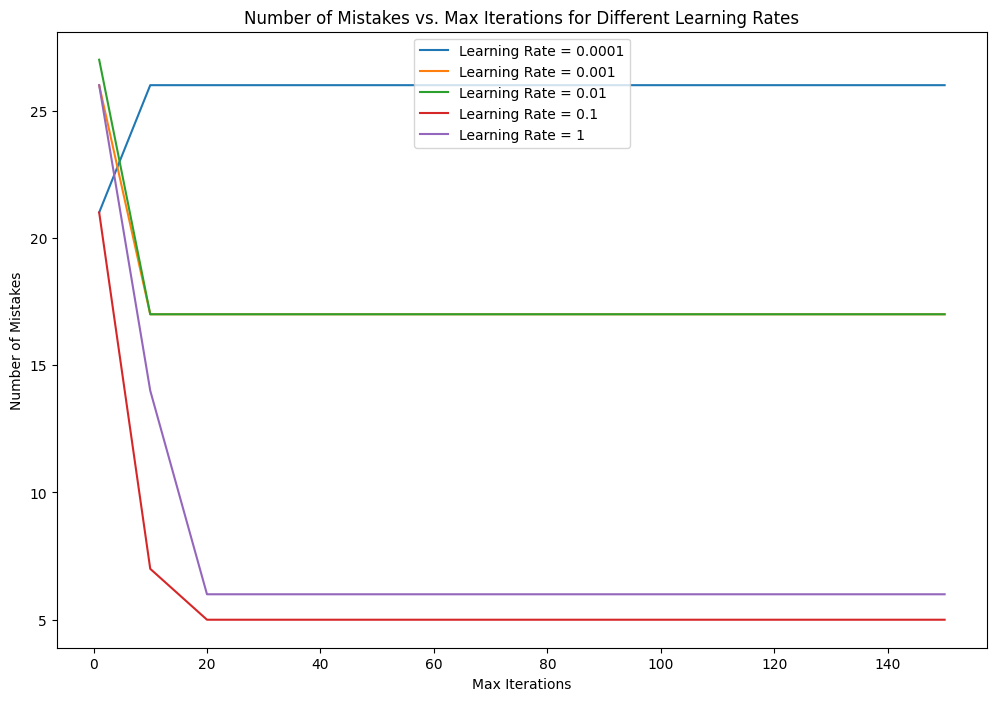

In [ ]:
perceptron_optimal(edm_binary_train, edm_yTrain, edm_vocab)

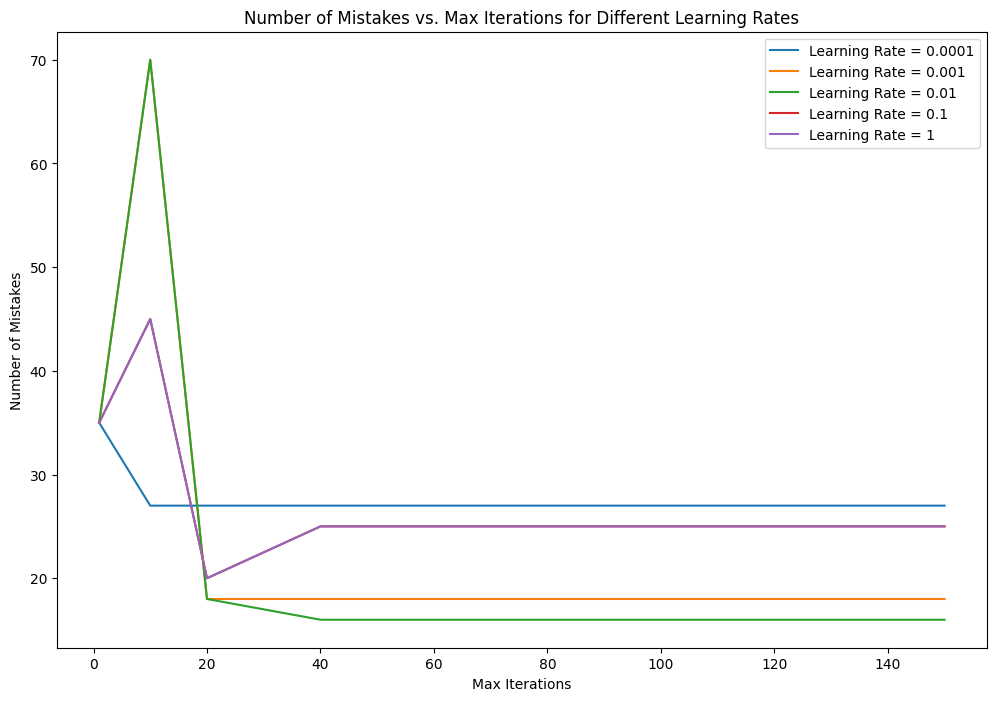

In [ ]:
perceptron_optimal(edm_count_train, edm_yTrain, edm_vocab)

In [ ]:
edm_max_iters = [20, 40]
edm_learning_rates = [0.1, 0.01]

In [ ]:
print("Accuracy score on edm dataset")
perceptron_accuracy(edm_binary_train, edm_binary_test, edm_count_train, edm_count_test, edm_yTrain, edm_yTest, edm_vocab, edm_max_iters, edm_learning_rates)

Accuracy score on edm dataset
Number of mistakes on binary train data:  10
Number of mistakes on binary test data:  24
Number of mistakes on count train data:  21
Number of mistakes on count test data:  22
Accuracy score on binary train data:  0.991869918699187
Accuracy score on binary test data:  0.9545454545454546
Accuracy score on count train data:  0.9829268292682927
Accuracy score on count test data:  0.9583333333333334
15 most positive words for binary model: 
['ever', 'uh', 'oh', 'lie', 'long', 'times', 'girls', 'where', 'many', 'na', 'lets', 'so', 'afraid', 'youve', 'feelin']
15 most negative words for binary model: 
['me', 'its', 'hold', 'put', 'think', 'not', 'one', 'around', 'live', 'lost', 'could', 'an', 'if', 'right', 'ive']
15 most positive words for count model: 
['hate', 'than', 'made', 'follow', 'lets', 'id', 'god', 'head', 'sorry', 'please', 'too', 'until', 'so', 'should', 'ill']
15 most negative words for count model: 
['ride', 'work', 'day', 'every', 'night', 'were'

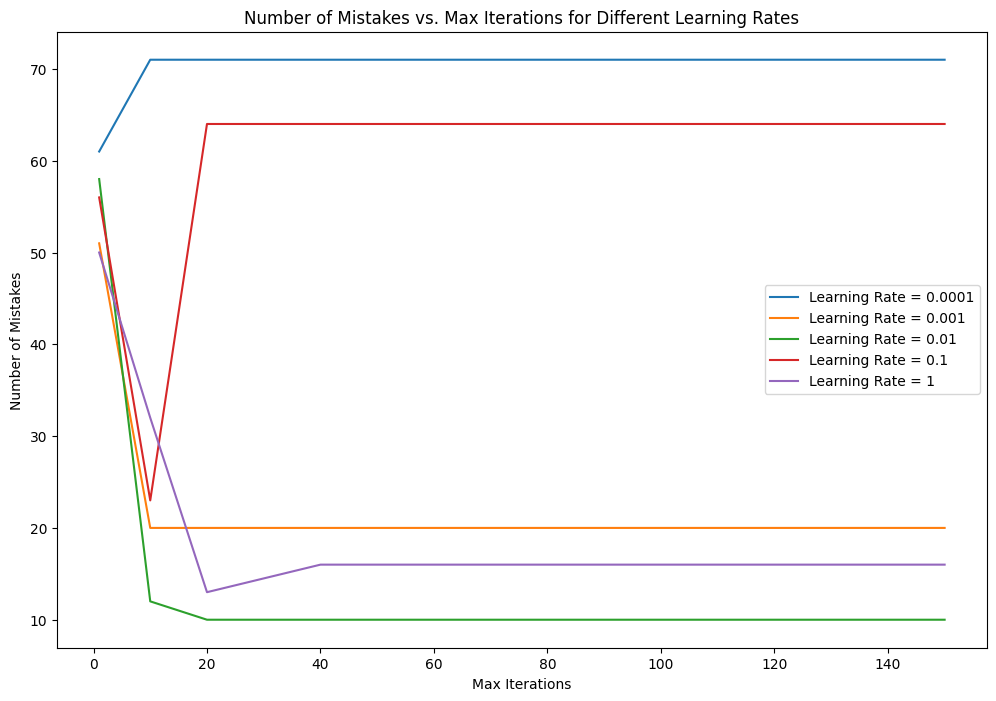

In [ ]:
perceptron_optimal(latin_binary_train, latin_yTrain, latin_vocab)

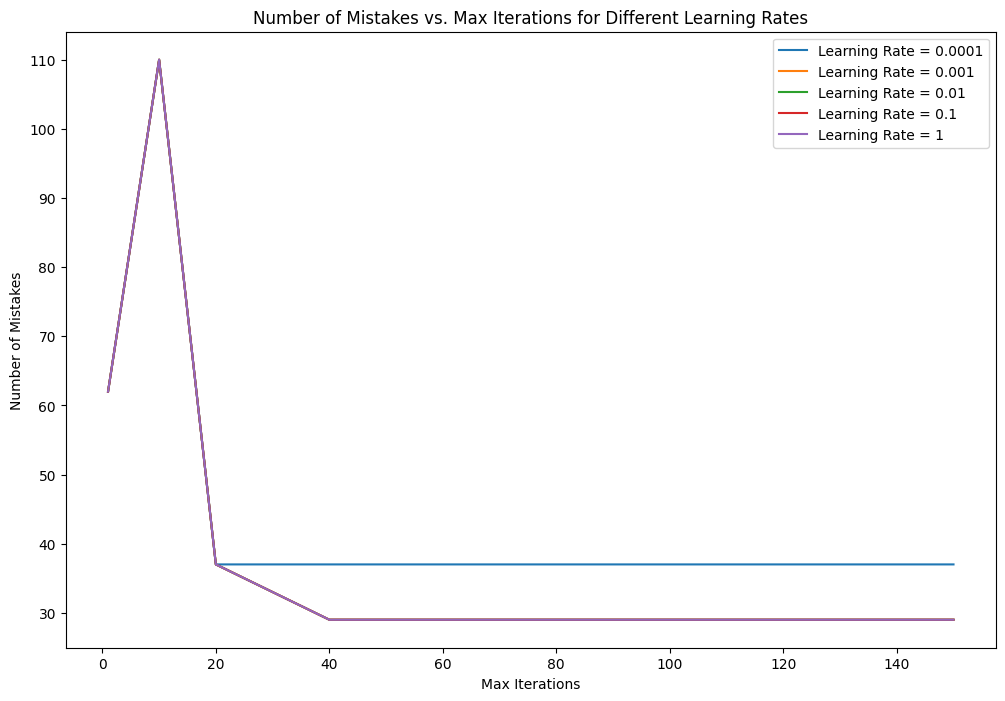

In [ ]:
perceptron_optimal(latin_count_train, latin_yTrain, latin_vocab)

In [ ]:
latin_max_iters = [20, 40]
latin_learning_rates = [0.01, 1]

In [ ]:
print("Accuracy score on latin dataset")
perceptron_accuracy(latin_binary_train, latin_binary_test, latin_count_train, latin_count_test, latin_yTrain, latin_yTest, latin_vocab, latin_max_iters, latin_learning_rates)

Accuracy score on latin dataset
Number of mistakes on binary train data:  27
Number of mistakes on binary test data:  45
Number of mistakes on count train data:  33
Number of mistakes on count test data:  72
Accuracy score on binary train data:  0.9549248747913188
Accuracy score on binary test data:  0.8255813953488372
Accuracy score on count train data:  0.9449081803005008
Accuracy score on count test data:  0.7209302325581395
15 most positive words for binary model: 
['life', 'aint', 'name', 'were', 'boy', 'cause', 'say', 'real', 'yeah', 'will', 'bout', 'can', 'made', 'friends', 'those']
15 most negative words for binary model: 
['thinking', 'hit', 'go', 'youve', 'stay', 'only', 'die', 'said', 'easy', 'the', 'seen', 'believe', 'know', 'wait', 'away']
15 most positive words for count model: 
['keep', 'would', 'break', 'name', 'shes', 'want', 'days', 'found', 'aint', 'friends', 'been', 'always', 'arms', 'around', 'at']
15 most negative words for count model: 
['hit', 'from', 'us', 'as'

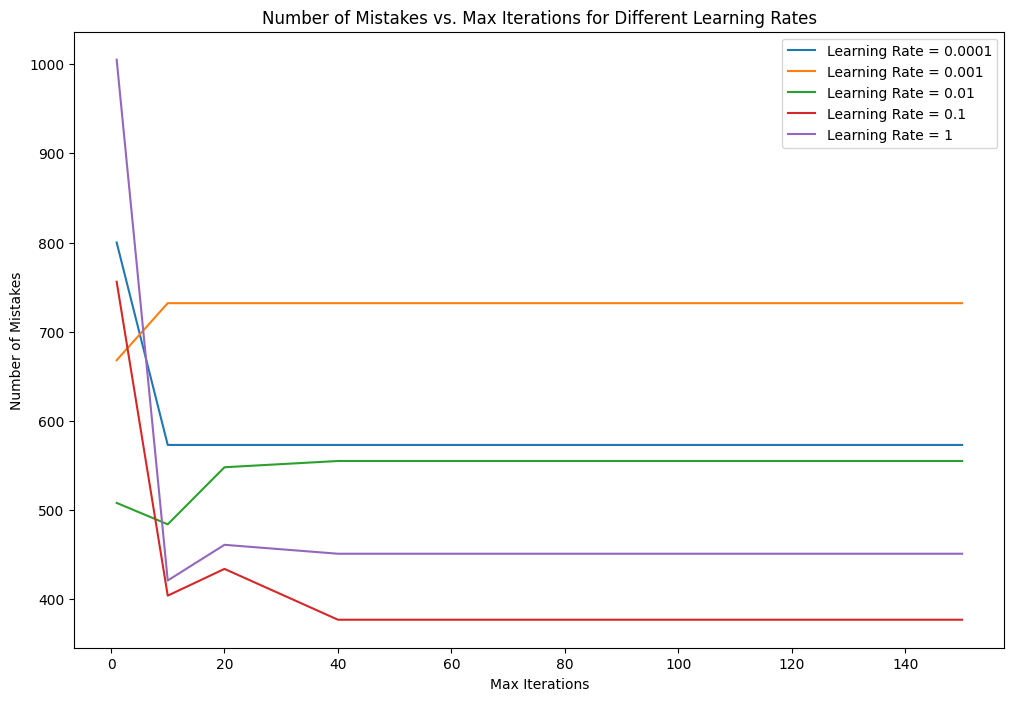

In [ ]:
perceptron_optimal(pop_binary_train, pop_yTrain, pop_vocab)

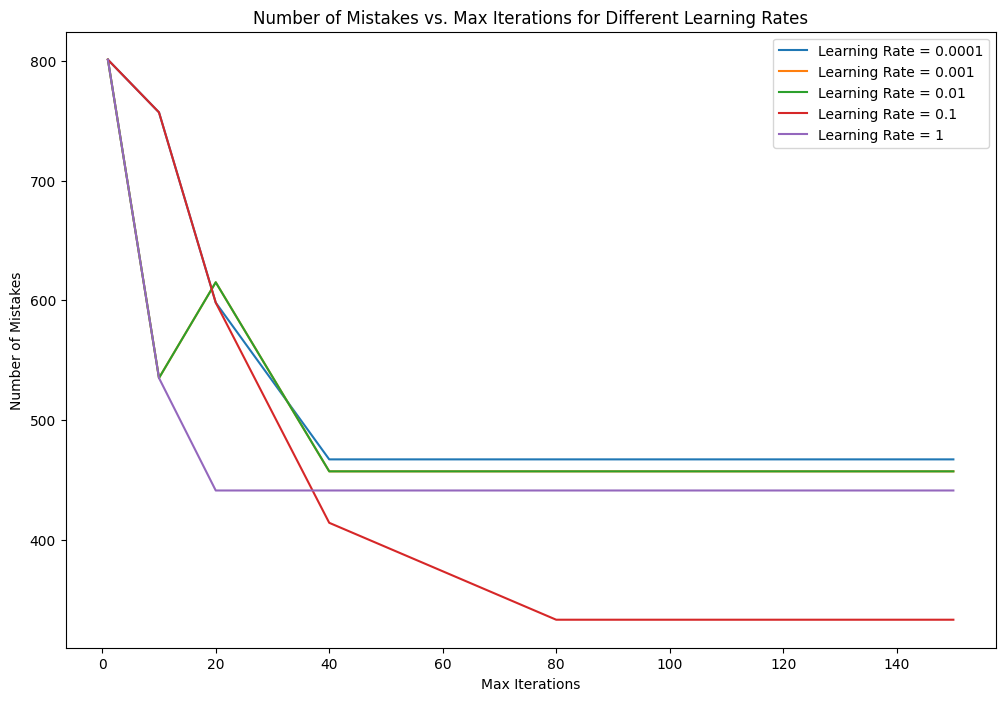

In [ ]:
perceptron_optimal(pop_count_train, pop_yTrain, pop_vocab)

In [ ]:
pop_max_iters = [40, 80]
pop_learning_rates = [0.1, 0.1]

In [ ]:
print("Accuracy score on pop dataset")
perceptron_accuracy(pop_binary_train, pop_binary_test, pop_count_train, pop_count_test, pop_yTrain, pop_yTest, pop_vocab, pop_max_iters, pop_learning_rates)

Accuracy score on pop dataset
Number of mistakes on binary train data:  532
Number of mistakes on binary test data:  470
Number of mistakes on count train data:  527
Number of mistakes on count test data:  269
Accuracy score on binary train data:  0.7967137944210928
Accuracy score on binary test data:  0.5811051693404634
Accuracy score on count train data:  0.7986243790599924
Accuracy score on count test data:  0.7602495543672014
15 most positive words for binary model: 
['runnin', 'falls', 'woman', 'ayy', 'outta', 'ends', 'bitches', 'guys', 'dear', 'lover', 'wearing', 'killing', 'ice', 'dirty', 'pass']
15 most negative words for binary model: 
['searching', 'belong', 'letting', 'strange', 'tongue', 'fake', 'needs', 'eat', 'telling', 'wasting', 'doing', 'nights', 'thousand', 'yo', 'heat']
15 most positive words for count model: 
['lucky', 'runnin', 'woman', 'outta', 'point', 'yourself', 'child', 'locked', 'come', 'lover', 'ocean', 'world', 'next', 'plan', 'fast']
15 most negative words

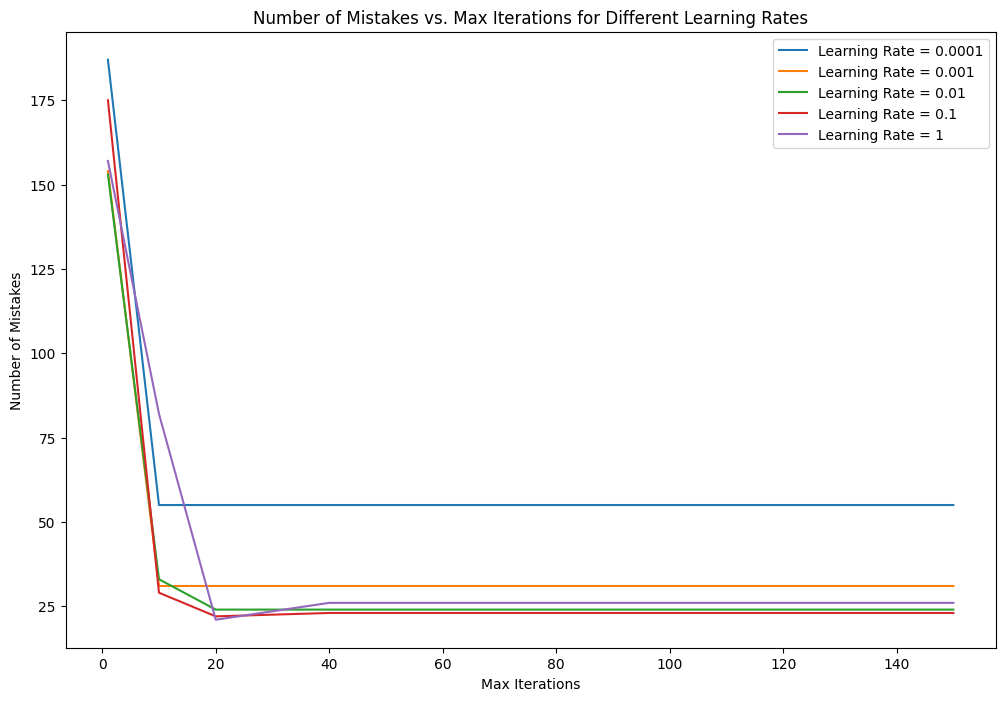

In [ ]:
perceptron_optimal(rap_binary_train, rap_yTrain, rap_vocab)

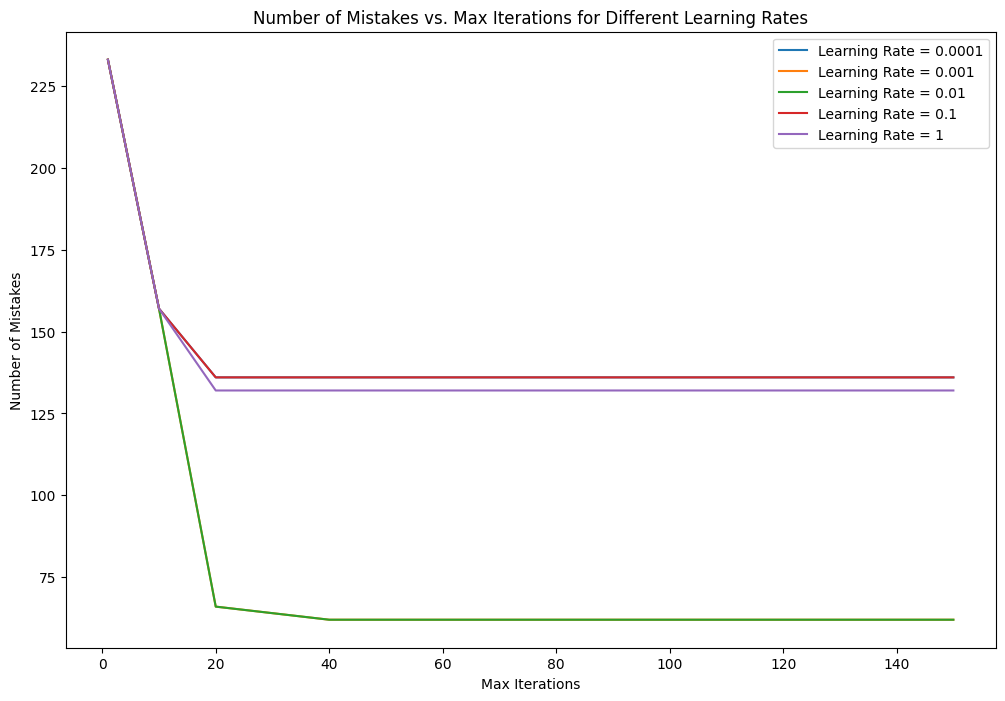

In [ ]:
perceptron_optimal(rap_count_train, rap_yTrain, rap_vocab)

In [ ]:
rap_max_iters = [20, 40]
rap_learning_rates = [0.1, 0.01]

In [ ]:
print("Accuracy score on rap dataset")
perceptron_accuracy(rap_binary_train, rap_binary_test, rap_count_train, rap_count_test, rap_yTrain, rap_yTest, rap_vocab, rap_max_iters, rap_learning_rates)

Accuracy score on rap dataset
Number of mistakes on binary train data:  25
Number of mistakes on binary test data:  124
Number of mistakes on count train data:  160
Number of mistakes on count test data:  99
Accuracy score on binary train data:  0.9857224443175329
Accuracy score on binary test data:  0.8348868175765646
Accuracy score on count train data:  0.9086236436322102
Accuracy score on count test data:  0.8681757656458056
15 most positive words for binary model: 
['bleed', 'go', 'ayy', 'huh', 'sippin', 'lord', 'jealous', 'switch', 'dont', 'fame', 'stress', 'ima', 'problems', 'outta', 'section']
15 most negative words for binary model: 
['hood', 'neck', 'now', 'weve', 'ball', 'those', 'living', 'dope', 'care', 'started', 'soul', 'world', 'space', 'imma', 'split']
15 most positive words for count model: 
['waitin', 'diamonds', 'scared', 'ring', 'meant', 'dogg', 'weekend', 'dat', 'lord', 'fly', 'while', 'news', 'times', 'nah', 'sippin']
15 most negative words for count model: 
['not

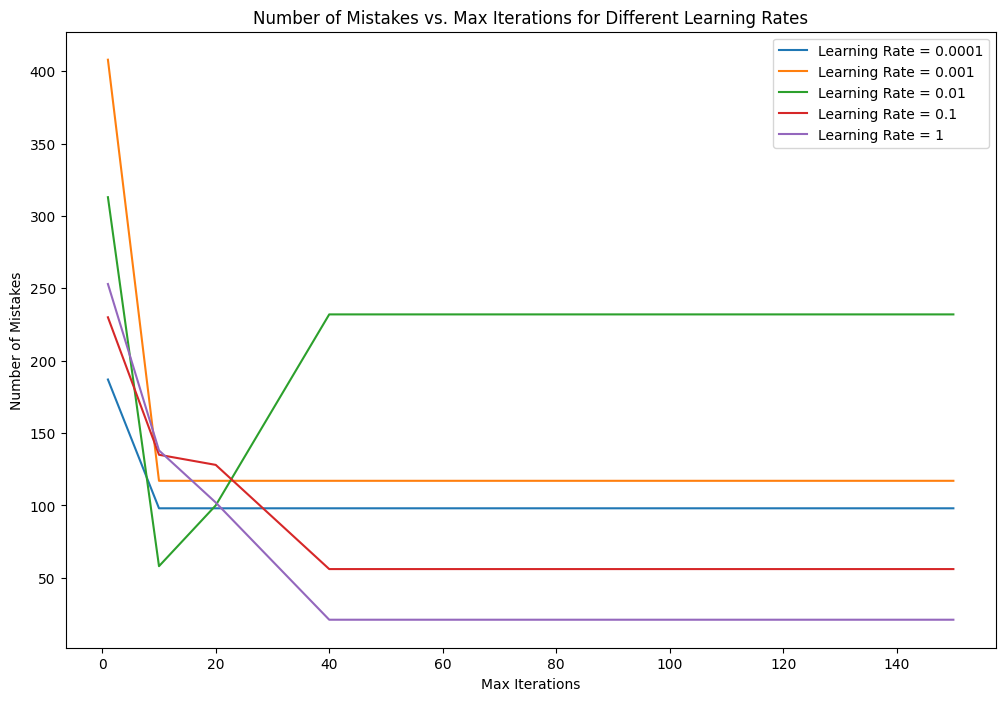

In [ ]:
perceptron_optimal(rb_binary_train, rb_yTrain, rb_vocab)

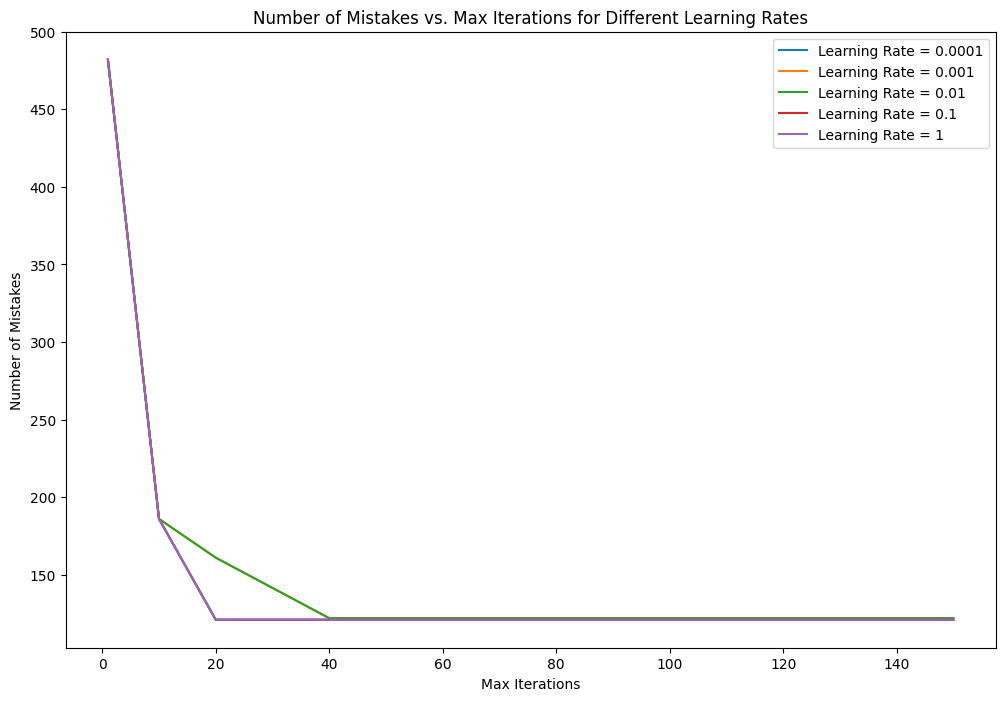

In [ ]:
perceptron_optimal(rb_count_train, rb_yTrain, rb_vocab)

In [ ]:
rb_max_iters = [40, 20]
rb_learning_rates = [1, 1]

In [ ]:
print("Accuracy score on rb dataset")
perceptron_accuracy(rb_binary_train, rb_binary_test, rb_count_train, rb_count_test, rb_yTrain, rb_yTest, rb_vocab, rb_max_iters, rb_learning_rates)

Accuracy score on rb dataset
Number of mistakes on binary train data:  38
Number of mistakes on binary test data:  124
Number of mistakes on count train data:  171
Number of mistakes on count test data:  170
Accuracy score on binary train data:  0.9828209764918626
Accuracy score on binary test data:  0.8693361433087461
Accuracy score on count train data:  0.9226943942133815
Accuracy score on count test data:  0.8208640674394099
15 most positive words for binary model: 
['skin', 'hurts', 'mad', 'ass', 'nasty', 'walls', 'drink', 'heard', 'ten', 'past', 'freak', 'build', 'fake', 'dry', 'single']
15 most negative words for binary model: 
['damn', 'wouldnt', 'cuz', 'everyday', 'oooh', 'seems', 'music', 'telling', 'being', 'already', 'bar', 'legs', 'pick', 'saying', 'before']
15 most positive words for count model: 
['break', 'songs', 'caught', 'waitin', 'build', 'ass', 'boo', 'done', 'seen', 'stars', 'used', 'place', 'skin', 'else', 'perfect']
15 most negative words for count model: 
['damn

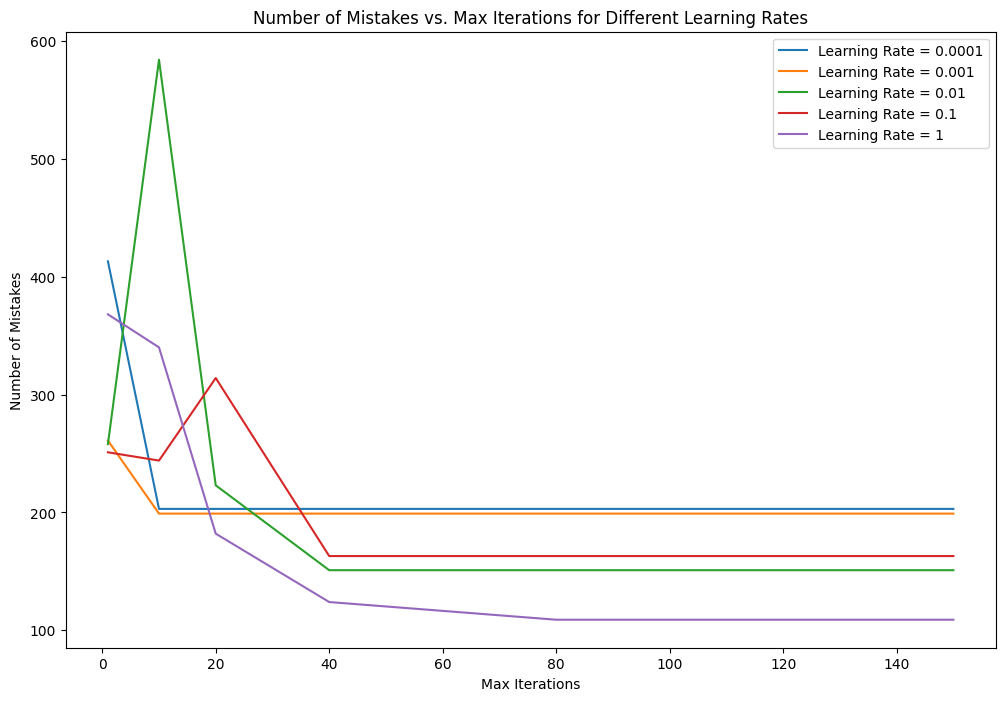

In [ ]:
perceptron_optimal(rock_binary_train, rock_yTrain, rock_vocab)

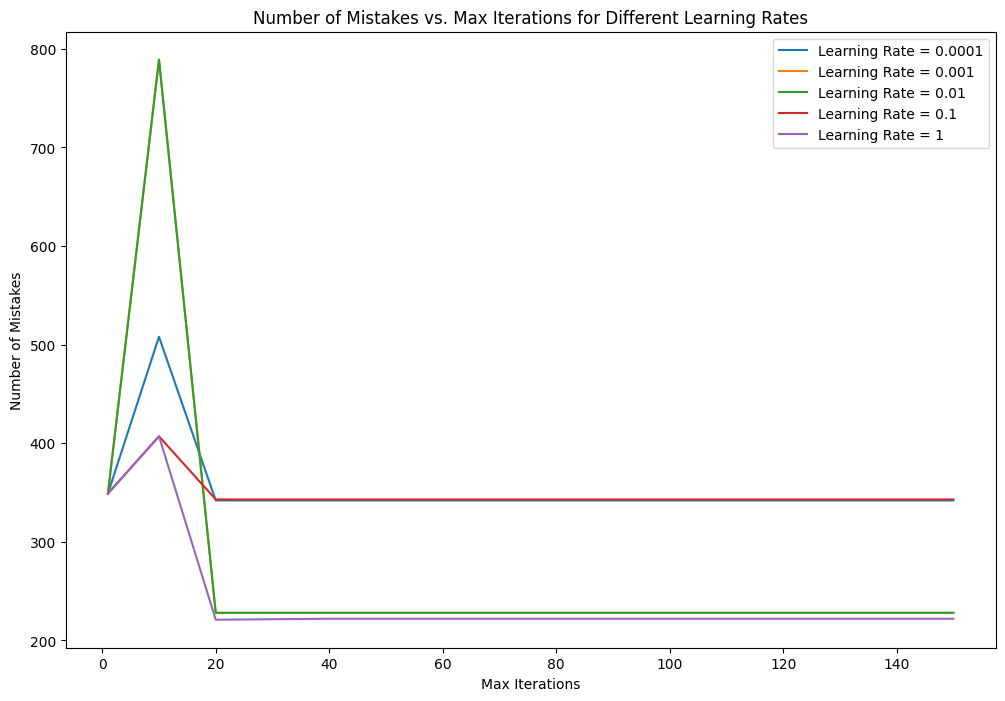

In [ ]:
perceptron_optimal(rock_count_train, rock_yTrain, rock_vocab)

In [ ]:
rock_max_iters = [40, 20]
rock_learning_rates = [1, 1]

In [ ]:
print("Accuracy score on rock dataset")
perceptron_accuracy(rock_binary_train, rock_binary_test, rock_count_train, rock_count_test, rock_yTrain, rock_yTest, rock_vocab, rock_max_iters, rock_learning_rates)

Accuracy score on rock dataset
Number of mistakes on binary train data:  114
Number of mistakes on binary test data:  240
Number of mistakes on count train data:  221
Number of mistakes on count test data:  137
Accuracy score on binary train data:  0.9519190215099115
Accuracy score on binary test data:  0.7640117994100295
Accuracy score on count train data:  0.906790383804302
Accuracy score on count test data:  0.8652900688298918
15 most positive words for binary model: 
['corner', 'death', 'lead', 'forget', 'mmm', 'hurts', 'sand', 'children', 'turned', 'somewhere', 'places', 'having', 'awake', 'older', 'bet']
15 most negative words for binary model: 
['thinking', 'surely', 'school', 'door', 'huh', 'follow', 'swear', 'beyond', 'lord', 'enough', 'lifes', 'listen', 'golden', 'kinda', 'could']
15 most positive words for count model: 
['whole', 'dry', 'though', 'highway', 'stop', 'runnin', 'kiss', 'dust', 'part', 'throw', 'sound', 'did', 'silence', 'maybe', 'speak']
15 most negative words 

In [ ]:
def multinomial(x_train, x_test, y_train, y_test):
    # Train a Multinomial Naive Bayes classifier on the training set
    nb = MultinomialNB()
    nb.fit(x_train, y_train)

    # Test the classifier on the test set and print the accuracy
    y_testpred = nb.predict(x_test)
    num_testmistakes = sum(y_testpred != y_test)
    y_trainpred = nb.predict(x_train)
    num_trainmistakes = sum(y_trainpred != y_train)
    accuracy = accuracy_score(y_test, y_testpred)
    print('NB Number of testmistakes:', num_testmistakes)
    print('NB Number of trainmistakes:', num_trainmistakes)
    print('NB Accuracy:', accuracy)


In [ ]:
print('Multinomial EDM Binary')
multinomial(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Multinomial EDM Count')
multinomial(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Multinomial Latin Binary')
multinomial(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Multinomial Latin Count')
multinomial(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Multinomial Pop Binary')
multinomial(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Multinomial Pop Count')
multinomial(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Multinomial Rap Binary')
multinomial(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Multinomial Rap Count')
multinomial(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Multinomial RB Binary')
multinomial(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Multinomial RB Count')
multinomial(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Multinomial Rock Binary')
multinomial(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Multinomial Rock Count')
multinomial(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Multinomial Total Binary')
multinomial(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Multinomial Total Count')
multinomial(total_count_train, total_count_test, total_yTrain, total_yTest)

Multinomial EDM Binary
NB Number of testmistakes: 18
NB Number of trainmistakes: 24
NB Accuracy: 0.9659090909090909
Multinomial EDM Count
NB Number of testmistakes: 53
NB Number of trainmistakes: 88
NB Accuracy: 0.8996212121212122
Multinomial Latin Binary
NB Number of testmistakes: 42
NB Number of trainmistakes: 41
NB Accuracy: 0.8372093023255814
Multinomial Latin Count
NB Number of testmistakes: 61
NB Number of trainmistakes: 58
NB Accuracy: 0.7635658914728682
Multinomial Pop Binary
NB Number of testmistakes: 297
NB Number of trainmistakes: 552
NB Accuracy: 0.7352941176470589
Multinomial Pop Count
NB Number of testmistakes: 354
NB Number of trainmistakes: 608
NB Accuracy: 0.6844919786096256
Multinomial Rap Binary
NB Number of testmistakes: 172
NB Number of trainmistakes: 246
NB Accuracy: 0.7709720372836218
Multinomial Rap Count
NB Number of testmistakes: 153
NB Number of trainmistakes: 253
NB Accuracy: 0.796271637816245
Multinomial RB Binary
NB Number of testmistakes: 126
NB Number of

In [ ]:
def Logistic(x_train, x_test, y_train, y_test):
  # Logistic Regression
  lr = LogisticRegression(max_iter=3000)

  # Binary data classification
  lr.fit(x_train, y_train)

  y1_testpred = lr.predict(x_test)
  num_testmistakes = sum(y1_testpred != y_test)
  y1_trainpred = lr.predict(x_train)
  num_trainmistakes = sum(y1_trainpred != y_train)
  accuracy = accuracy_score(y_test, y1_testpred)
  print('Logistic Regression Number of testmistakes:', num_testmistakes)
  print('Logistic Regression Number of trainmistakes:', num_trainmistakes)
  print('Logistic Regression Accuracy:', accuracy)

In [ ]:
print('Logistic EDM Binary')
Logistic(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Logistic EDM Count')
Logistic(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Logistic Latin Binary')
Logistic(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Logistic Latin Count')
Logistic(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Logistic Pop Binary')
Logistic(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Logistic Pop Count')
Logistic(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Logistic Rap Binary')
Logistic(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Logistic Rap Count')
Logistic(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Logistic RB Binary')
Logistic(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Logistic RB Count')
Logistic(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Logistic Rock Binary')
Logistic(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Logistic Rock Count')
Logistic(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Logistic Total Binary')
Logistic(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Logistic Total Count')
Logistic(total_count_train, total_count_test, total_yTrain, total_yTest)

Logistic EDM Binary
Logistic Regression Number of testmistakes: 18
Logistic Regression Number of trainmistakes: 7
Logistic Regression Accuracy: 0.9659090909090909
Logistic EDM Count
Logistic Regression Number of testmistakes: 32
Logistic Regression Number of trainmistakes: 5
Logistic Regression Accuracy: 0.9393939393939394
Logistic Latin Binary
Logistic Regression Number of testmistakes: 47
Logistic Regression Number of trainmistakes: 9
Logistic Regression Accuracy: 0.8178294573643411
Logistic Latin Count
Logistic Regression Number of testmistakes: 50
Logistic Regression Number of trainmistakes: 4
Logistic Regression Accuracy: 0.8062015503875969
Logistic Pop Binary
Logistic Regression Number of testmistakes: 351
Logistic Regression Number of trainmistakes: 270
Logistic Regression Accuracy: 0.6871657754010695
Logistic Pop Count
Logistic Regression Number of testmistakes: 343
Logistic Regression Number of trainmistakes: 103
Logistic Regression Accuracy: 0.6942959001782532
Logistic Rap Bi

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

def multinomial_optimal(xTrain, yTrain):

  max_iters = range(1, 30)
  learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

  plt.figure(figsize=(12, 8))  # Create a figure

  # Plot number of mistakes based on max_iter for different learning rates
  for lr in learning_rates:
    mistakes = []

    for max_iter in max_iters:
      model = Perceptron(random_state=1, max_iter=max_iter, eta0=lr)
      model.fit(xTrain, yTrain)

      predictions = model.predict(xTrain)

      num_mistakes = sum(predictions != yTrain)

      mistakes.append(num_mistakes)

    # Plot the line for current learning rate
    label = 'Learning Rate = {}'.format(lr)
    plt.plot(max_iters, mistakes, '-', label=label)

  plt.xlabel('Max Iterations')
  plt.ylabel('Number of Mistakes')
  plt.legend()
  plt.title('Number of Mistakes vs. Max Iterations for Different Learning Rates')
  plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def multinomial_optimal(x_train, x_test, y_train, y_test):
    learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
    max_likelihoods = []

    for lr in learning_rates:
        nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        nb.fit(x_train, y_train)

        y_tain_pred = nb.predict(x_train)
        num_test_mistakes = sum(y_tain_pred != y_train)
        accuracy = accuracy_score(y_train, y_tain_pred)

        max_likelihood = nb.class_log_prior_[1] + nb.feature_log_prob_[1].sum() # compute maximum likelihood
        max_likelihoods.append(max_likelihood)

        print('Learning Rate: {}, Test Mistakes: {}, Accuracy: {}, Maximum Likelihood: {}'.format(
            lr, num_test_mistakes, accuracy, max_likelihood))

    plt.figure(figsize=(12, 8))
    plt.plot(learning_rates, max_likelihoods, 'o-')
    plt.xlabel('Learning Rate')
    plt.ylabel('Maximum Likelihood')
    plt.title('Maximum Likelihood vs. Learning Rate')
    plt.show()


Learning Rate: 0.0001, Test Mistakes: 24, Accuracy: 0.9804878048780488, Maximum Likelihood: -3006.1388222758214
Learning Rate: 0.001, Test Mistakes: 24, Accuracy: 0.9804878048780488, Maximum Likelihood: -3006.1388222758214
Learning Rate: 0.01, Test Mistakes: 24, Accuracy: 0.9804878048780488, Maximum Likelihood: -3006.1388222758214
Learning Rate: 0.1, Test Mistakes: 24, Accuracy: 0.9804878048780488, Maximum Likelihood: -3006.1388222758214
Learning Rate: 1, Test Mistakes: 24, Accuracy: 0.9804878048780488, Maximum Likelihood: -3006.1388222758214


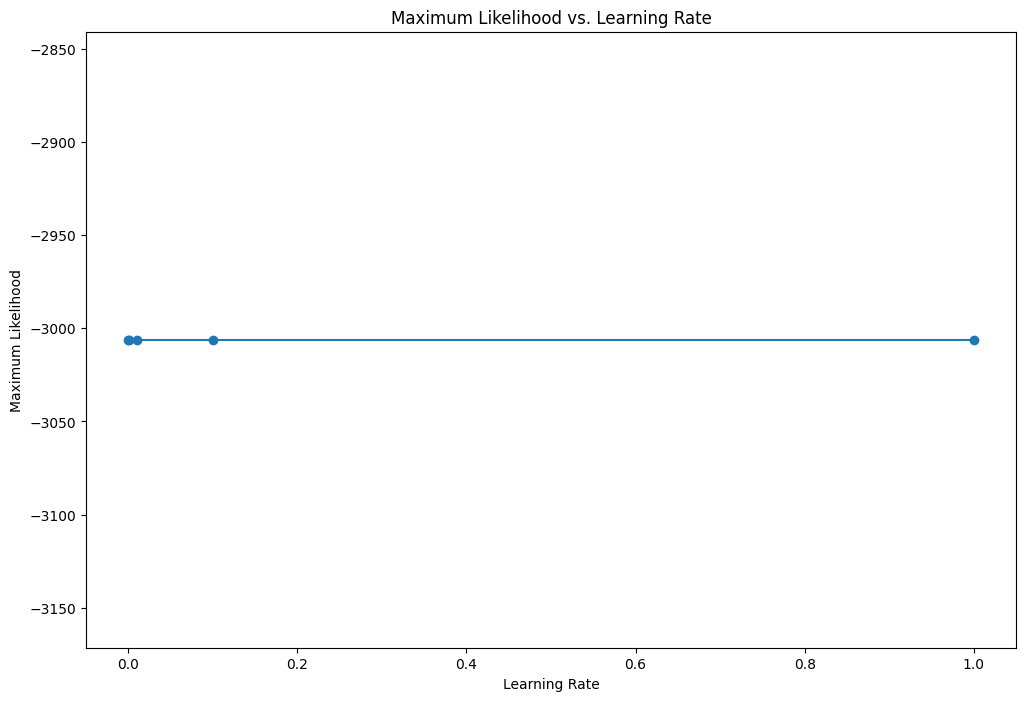

In [ ]:
multinomial_optimal(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def logistic_optimal(x_train, x_test, y_train, y_test):
  # Load the iris dataset
  iris = load_iris()


  # Define the parameter grid
  param_grid = {'max_iter': [1, 5, 10, 30, 50, 70], 'C': [0.0001, 0.001, 0.01, 0.1, 1], 'solver': ['lbfgs'], 'multi_class': ['multinomial']}

  # Create a logistic regression model
  logreg = LogisticRegression()

  # Perform grid search to find the best hyperparameters
  grid_search_train = GridSearchCV(logreg, param_grid=param_grid, cv=5)
  grid_search_train.fit(x_train, y_train)

  grid_search_test = GridSearchCV(logreg, param_grid=param_grid, cv=5)
  grid_search_test.fit(x_test, y_test)

  # Print the best hyperparameters and the corresponding score
  print("Best train parameters: ", grid_search_train.best_params_)
  print("Best train score: ", grid_search_train.best_score_)
  print("Best test parameters: ", grid_search_test.best_params_)
  print("Best test score: ", grid_search_test.best_score_)


In [ ]:
logistic_optimal(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)

Best train parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best train score:  0.978048780487805
Best test parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best test score:  0.9678167115902966


In [ ]:
print('Multinomial EDM Binary')
logistic_optimal(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Multinomial EDM Count')
logistic_optimal(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Multinomial Latin Binary')
logistic_optimal(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Multinomial Latin Count')
logistic_optimal(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Multinomial Pop Binary')
logistic_optimal(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Multinomial Pop Count')
logistic_optimal(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Multinomial Rap Binary')
logistic_optimal(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Multinomial Rap Count')
logistic_optimal(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Multinomial RB Binary')
logistic_optimal(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Multinomial RB Count')
logistic_optimal(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Multinomial Rock Binary')
logistic_optimal(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Multinomial Rock Count')
logistic_optimal(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Multinomial Total Binary')
logistic_optimal(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Multinomial Total Count')
logistic_optimal(total_count_train, total_count_test, total_yTrain, total_yTest)

Logistic EDM Binary
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.978048780487805
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.9678167115902966
Logistic EDM Count
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.978048780487805
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.9659119496855346
Logistic Latin Binary
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.886484593837535
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.8566365007541478
Logistic Latin Count
Best parameters:  {'C': 0.0001, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best score:  0.9048459383753501
Best parameters:  

KeyboardInterrupt: ignored

In [ ]:
print('Multinomial EDM Binary')
logistic_optimal(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Multinomial EDM Count')
logistic_optimal(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Multinomial Latin Binary')
logistic_optimal(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Multinomial Latin Count')
logistic_optimal(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Multinomial Pop Binary')
logistic_optimal(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Multinomial Pop Count')
logistic_optimal(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Multinomial Rap Binary')
logistic_optimal(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Multinomial Rap Count')
logistic_optimal(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Multinomial RB Binary')
logistic_optimal(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Multinomial RB Count')
logistic_optimal(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Multinomial Rock Binary')
logistic_optimal(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Multinomial Rock Count')
logistic_optimal(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Multinomial Total Binary')
logistic_optimal(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Multinomial Total Count')
logistic_optimal(total_count_train, total_count_test, total_yTrain, total_yTest)

Multinomial EDM Binary
Best train parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best train score:  0.978048780487805
Best test parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best test score:  0.9678167115902966
Multinomial EDM Count
Best train parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best train score:  0.978048780487805
Best test parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best test score:  0.9678167115902966
Multinomial Latin Binary
Best train parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best train score:  0.886484593837535
Best test parameters:  {'C': 0.0001, 'max_iter': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best test score:  0.8566365007541478
Multinomial Latin Count
Best train parameters:  {'C': 0.0001, 'max_iter': 30, 'multi_class': 'multi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [ ]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))


Mean Squared Error: 574.58


In [ ]:
print("R^2 Score: {:.2f}".format(r2))


R^2 Score: 0.04


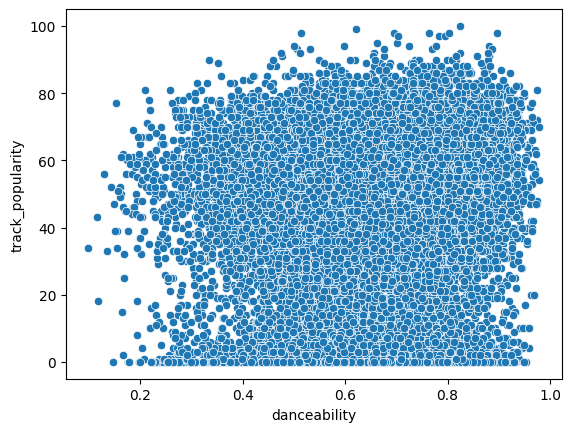

In [ ]:
sns.scatterplot(x='danceability', y='track_popularity', data=df)
plt.show()

NameError: ignored

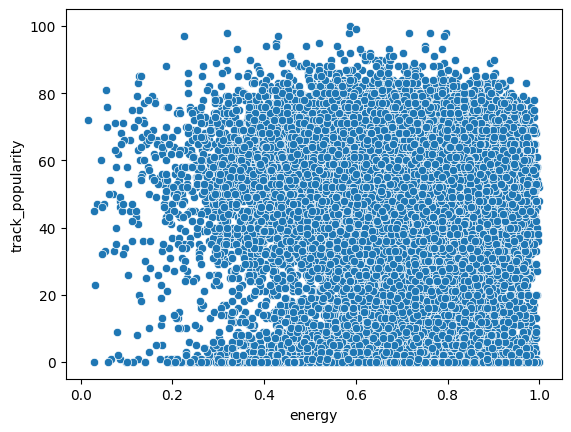

In [ ]:
sns.scatterplot(x='energy', y='track_popularity', data=df)
plt.show()

NameError: ignored

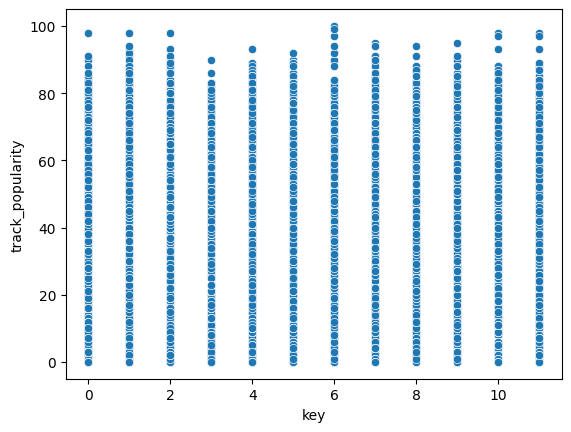

In [ ]:
sns.scatterplot(x='key', y='track_popularity', data=df)
plt.show()

NameError: ignored

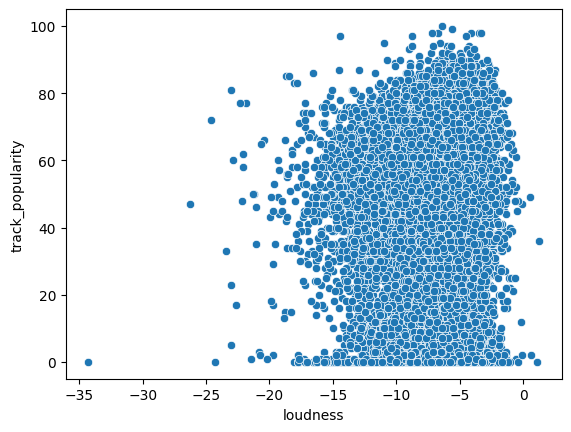

In [ ]:
sns.scatterplot(x='loudness', y='track_popularity', data=df)
plt.show()

NameError: ignored

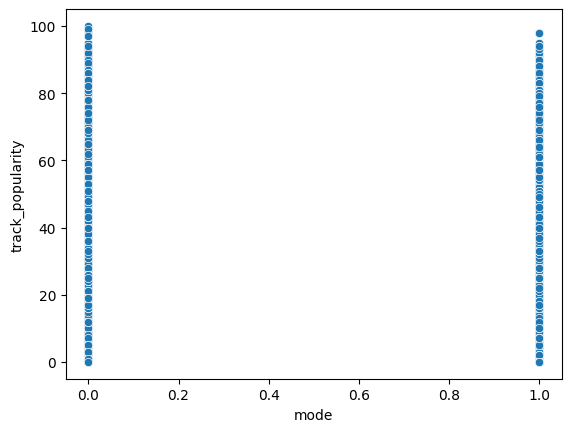

In [ ]:
sns.scatterplot(x='mode', y='track_popularity', data=df)
plt.show()

NameError: ignored

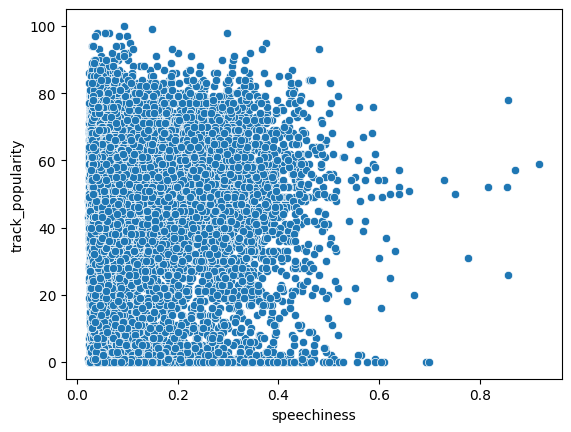

In [ ]:
sns.scatterplot(x='speechiness', y='track_popularity', data=df)
plt.show()

NameError: ignored

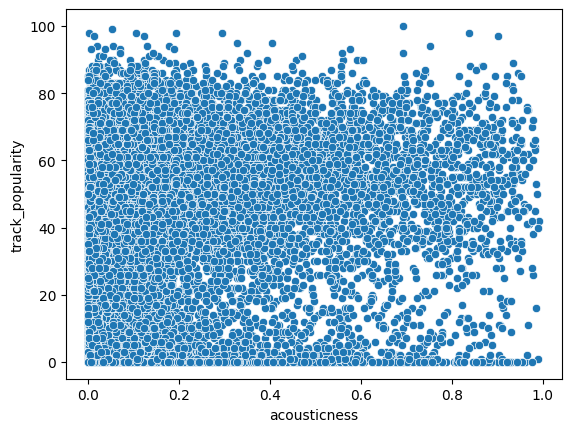

In [ ]:
sns.scatterplot(x='acousticness', y='track_popularity', data=df)
plt.show()

NameError: ignored

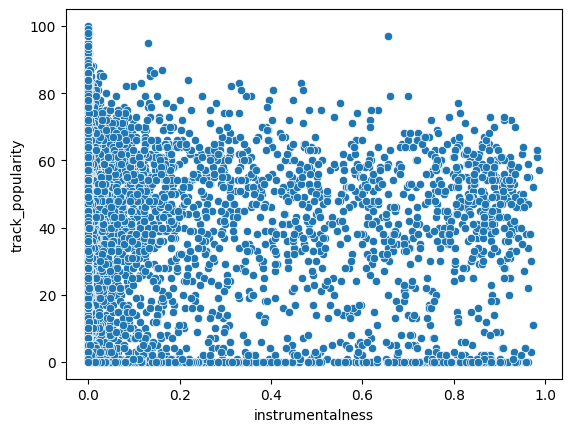

In [ ]:
sns.scatterplot(x='instrumentalness', y='track_popularity', data=df)
plt.show()

NameError: ignored

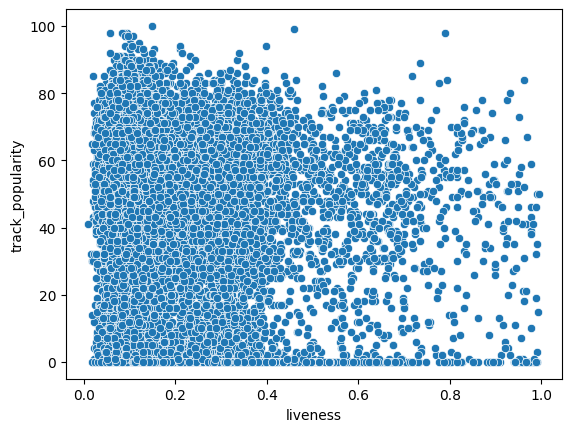

In [ ]:
sns.scatterplot(x='liveness', y='track_popularity', data=df)
plt.show()

NameError: ignored

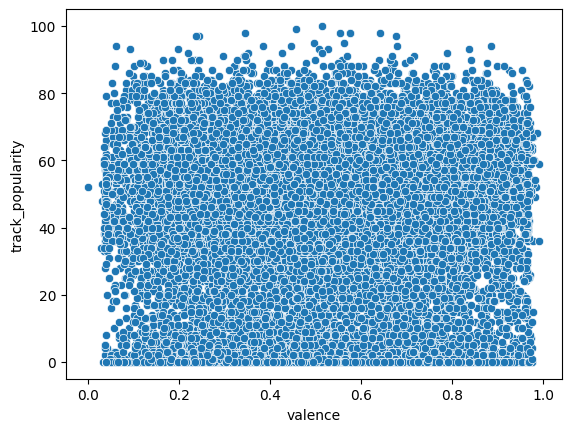

In [ ]:
sns.scatterplot(x='valence', y='track_popularity', data=df)
plt.show()

NameError: ignored

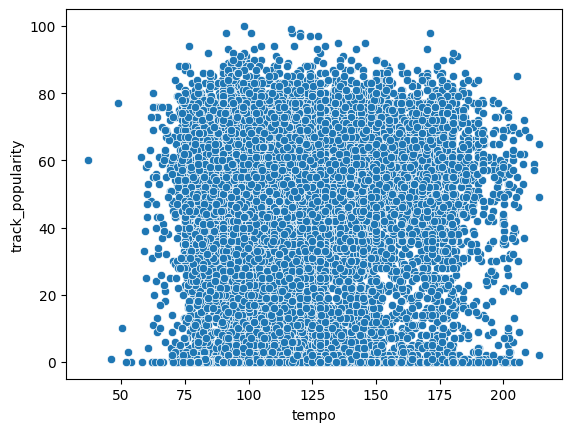

In [ ]:
sns.scatterplot(x='tempo', y='track_popularity', data=df)
plt.show()

NameError: ignored

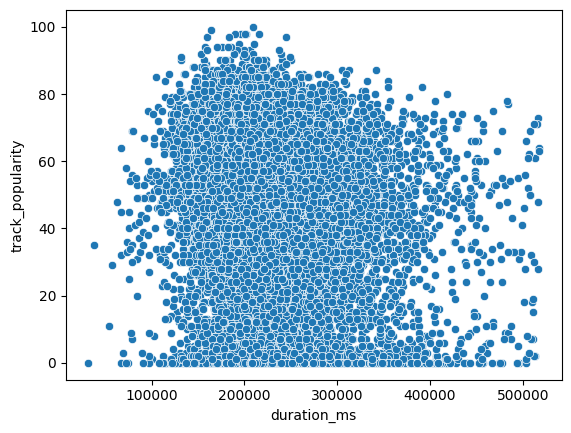

In [ ]:
sns.scatterplot(x='duration_ms', y='track_popularity', data=df)
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-20-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.061499,-0.093521,-0.006878,0.031290,0.010947,-0.000622,0.076821,-0.080933,-0.059334,-0.004490,0.011954,-0.143970
danceability,0.061499,1.000000,-0.089708,0.002090,0.022830,-0.078020,0.204041,-0.029240,-0.049187,-0.114719,0.343419,-0.201465,-0.133803
energy,-0.093521,-0.089708,1.000000,0.018833,0.674795,-0.009903,-0.011986,-0.546033,0.042093,0.156931,0.207941,0.138291,-0.021134
key,-0.006878,0.002090,0.018833,1.000000,0.007280,-0.169589,0.026282,-0.002067,0.004243,0.000682,0.021927,-0.018967,0.016984
loudness,0.031290,0.022830,0.674795,0.007280,1.000000,-0.035276,0.029858,-0.370628,-0.099164,0.071159,0.050211,0.082558,-0.159026
mode,0.010947,-0.078020,-0.009903,-0.169589,-0.035276,1.000000,-0.070013,0.022191,-0.002906,0.004850,-0.009382,0.026421,0.012433
speechiness,-0.000622,0.204041,-0.011986,0.026282,0.029858,-0.070013,1.000000,-0.000217,-0.108365,0.060072,0.035202,0.033620,-0.094343
acousticness,0.076821,-0.029240,-0.546033,-0.002067,-0.370628,0.022191,-0.000217,1.000000,-0.015803,-0.067491,-0.069817,-0.096149,-0.052996
instrumentalness,-0.080933,-0.049187,0.042093,0.004243,-0.099164,-0.002906,-0.108365,-0.015803,1.000000,-0.000021,-0.103020,0.028126,0.078505
liveness,-0.059334,-0.114719,0.156931,0.000682,0.071159,0.004850,0.060072,-0.067491,-0.000021,1.000000,-0.006931,0.015658,0.026988


<ipython-input-23-bae8a7f0616d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


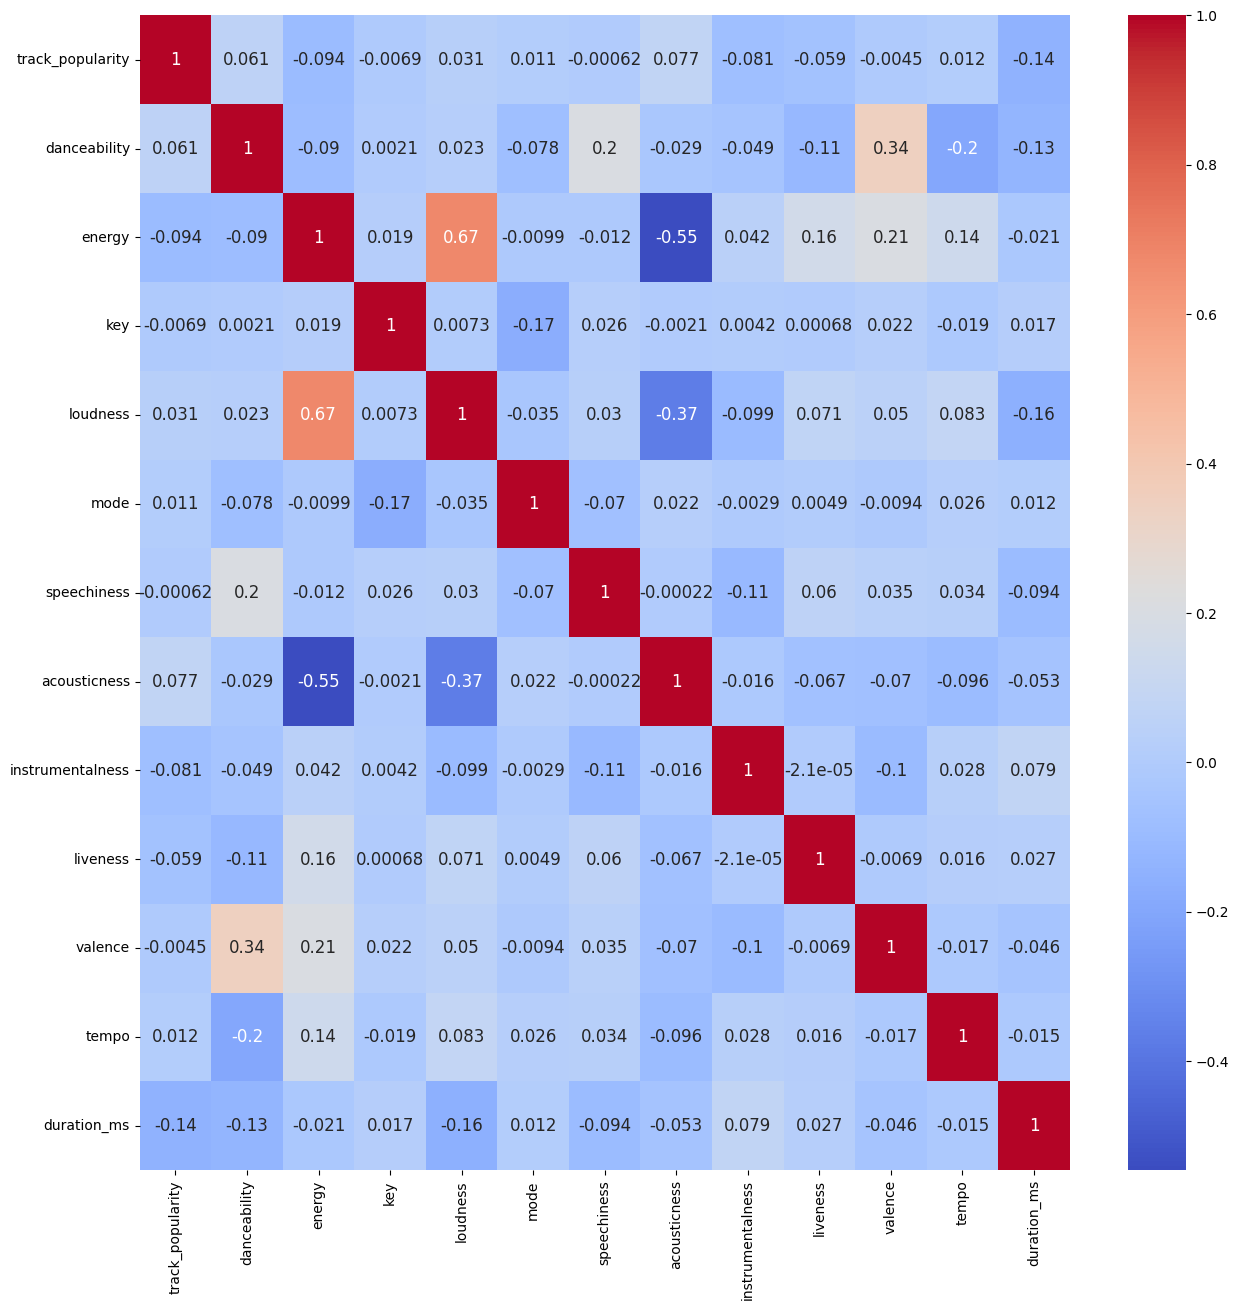

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"fontsize":12}, ax=ax)
plt.show()

In [ ]:
residuals = y_test - y_pred
residuals

6174      5.565989
8294     16.266536
4375      1.628423
10311    21.823949
5965    -39.705516
           ...    
9464     -4.820903
14477    52.451083
4980     -1.350045
8565    -40.400230
1681      9.025771
Name: track_popularity, Length: 3691, dtype: float64

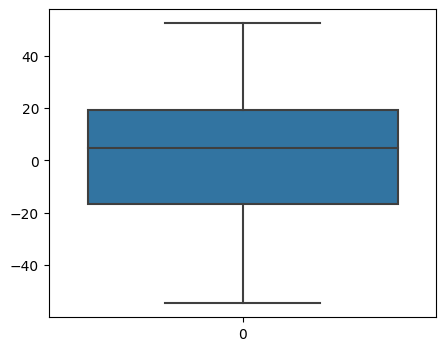

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(residuals, ax=ax)
plt.show()

In [ ]:
y_pred

array([33.43401108, 49.7334639 , 37.37157681, ..., 48.35004489,
       40.40023049, 42.97422876])